In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import itertools

indexes = list(itertools.product([0,1,2,3,4,5,6,7],[0,1,2],[0,1,2]))
print(indexes)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 2, 0), (4, 2, 1), (4, 2, 2), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 1, 0), (5, 1, 1), (5, 1, 2), (5, 2, 0), (5, 2, 1), (5, 2, 2), (6, 0, 0), (6, 0, 1), (6, 0, 2), (6, 1, 0), (6, 1, 1), (6, 1, 2), (6, 2, 0), (6, 2, 1), (6, 2, 2), (7, 0, 0), (7, 0, 1), (7, 0, 2), (7, 1, 0), (7, 1, 1), (7, 1, 2), (7, 2, 0), (7, 2, 1), (7, 2, 2)]


In [5]:
def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

In [6]:
def get_F(h, s, v):
    h_norm = normalize(
        h,
        {'actual': {'lower': 0, 'upper': 179}, 'desired': {'lower': 0, 'upper': 360}}
    )
    s_norm = normalize(
        s,
        {'actual': {'lower': 0, 'upper': 255}, 'desired': {'lower': 0, 'upper': 1}}
    )
    v_norm = normalize(
        v,
        {'actual': {'lower': 0, 'upper': 255}, 'desired': {'lower': 0, 'upper': 1}}
    )
    
    h_norm = np.array(h_norm).flatten()
    s_norm = np.array(s_norm).flatten()
    v_norm = np.array(v_norm).flatten()
    
    h_d = {}
    s_d = {}
    v_d = {}

    for i in range(len(h_norm)):
        H = h_norm[i]
        if H >= 316 or H <= 20:
            ha = 0
        elif H >= 21 and H <= 40:
            ha = 1
        elif H >= 41 and H <= 75:
            ha = 2
        elif H >= 76 and H <= 155:
            ha = 3
        elif H >= 156 and H <= 190:
            ha = 4
        elif H >= 191 and H <= 270:
            ha = 5
        elif H >= 271 and H <= 295:
            ha = 6
        elif H >= 296 and H <= 315:
            ha = 7
        if ha not in h_d:
            h_d[ha] = 1
        else:
            h_d[ha] += 1

    for i in range(len(s_norm)):
        S = s_norm[i]
        if S >= 0 and S <= 0.2:
            sa = 0
        elif S > 0.2 and S <= 0.7:
            sa = 1
        elif S > 0.7 and S <= 1:
            sa = 2
        if sa not in s_d:
            s_d[sa] = 1
        else:
            s_d[sa] += 1

    for i in range(len(v_norm)):
        V = v_norm[i]
        if V >= 0 and V <= 0.2:
            va = 0
        elif V > 0.2 and V <= 0.7:
            va = 1
        elif V > 0.7 and V <= 1:
            va = 2
        if va not in v_d:
            v_d[va] = 1
        else:
            v_d[va] += 1
            
    F = np.zeros((72,))
    
    for i in range(8):
        for j in range(3):
            for k in range(3):
                F[indexes.index((i, j, k))] = 9*h_d[i] + 3*s_d[j] + v_d[k]
    return F

[209617. 244992. 197201.  74167. 109542.  61751.  31696.  67071.  19280.
 208186. 243561. 195770.  72736. 108111.  60320.  30265.  65640.  17849.
 273769. 309144. 261353. 138319. 173694. 125903.  95848. 131223.  83432.
 353707. 389082. 341291. 218257. 253632. 205841. 175786. 211161. 163370.
 210769. 246144. 198353.  75319. 110694.  62903.  32848.  68223.  20432.
 627370. 662745. 614954. 491920. 527295. 479504. 449449. 484824. 437033.
 201436. 236811. 189020.  65986. 101361.  53570.  23515.  58890.  11099.
 199978. 235353. 187562.  64528.  99903.  52112.  22057.  57432.   9641.]


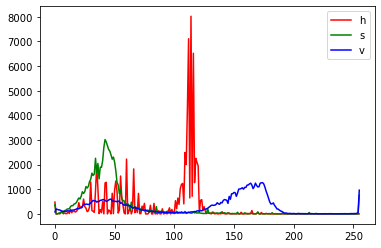

[210217. 247309. 198658.  73966. 111058.  62407.  32071.  69163.  20512.
 206572. 243664. 195013.  70321. 107413.  58762.  28426.  65518.  16867.
 274441. 311533. 262882. 138190. 175282. 126631.  96295. 133387.  84736.
 355324. 392416. 343765. 219073. 256165. 207514. 177178. 214270. 165619.
 212089. 249181. 200530.  75838. 112930.  64279.  33943.  71035.  22384.
 621670. 658762. 610111. 485419. 522511. 473860. 443524. 480616. 431965.
 200839. 237931. 189280.  64588. 101680.  53029.  22693.  59785.  11134.
 199552. 236644. 187993.  63301. 100393.  51742.  21406.  58498.   9847.]


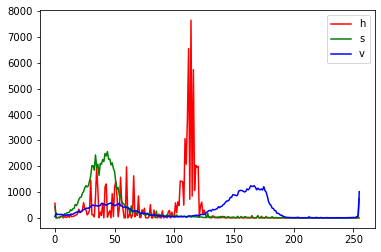

[205137. 233834. 190537.  83736. 112433.  69136.  39681.  68378.  25081.
 203976. 232673. 189376.  82575. 111272.  67975.  38520.  67217.  23920.
 269478. 298175. 254878. 148077. 176774. 133477. 104022. 132719.  89422.
 352782. 381479. 338182. 231381. 260078. 216781. 187326. 216023. 172726.
 208782. 237479. 194182.  87381. 116078.  72781.  43326.  72023.  28726.
 608040. 636737. 593440. 486639. 515336. 472039. 442584. 471281. 427984.
 195705. 224402. 181105.  74304. 103001.  59704.  30249.  58946.  15649.
 193860. 222557. 179260.  72459. 101156.  57859.  28404.  57101.  13804.]


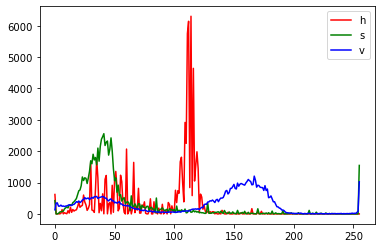

[213545. 244652. 199247.  81644. 112751.  67346.  40616.  71723.  26318.
 209522. 240629. 195224.  77621. 108728.  63323.  36593.  67700.  22295.
 280757. 311864. 266459. 148856. 179963. 134558. 107828. 138935.  93530.
 345962. 377069. 331664. 214061. 245168. 199763. 173033. 204140. 158735.
 216992. 248099. 202694.  85091. 116198.  70793.  44063.  75170.  29765.
 610922. 642029. 596624. 479021. 510128. 464723. 437993. 469100. 423695.
 201350. 232457. 187052.  69449. 100556.  55151.  28421.  59528.  14123.
 199406. 230513. 185108.  67505.  98612.  53207.  26477.  57584.  12179.]


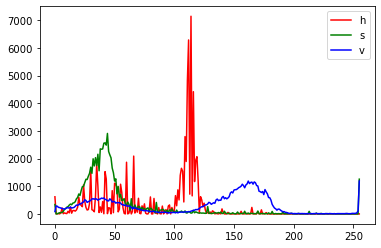

[212587. 245633. 199530.  76582. 109628.  63525.  36193.  69239.  23136.
 210490. 243536. 197433.  74485. 107531.  61428.  34096.  67142.  21039.
 284902. 317948. 271845. 148897. 181943. 135840. 108508. 141554.  95451.
 351133. 384179. 338076. 215128. 248174. 202071. 174739. 207785. 161682.
 214819. 247865. 201762.  78814. 111860.  65757.  38425.  71471.  25368.
 613159. 646205. 600102. 477154. 510200. 464097. 436765. 469811. 423708.
 202318. 235364. 189261.  66313.  99359.  53256.  25924.  58970.  12867.
 200752. 233798. 187695.  64747.  97793.  51690.  24358.  57404.  11301.]


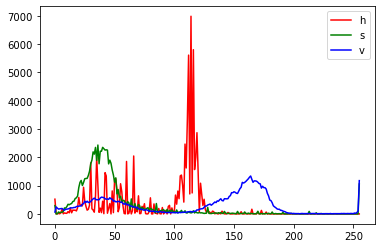

[209908. 242706. 197666.  78874. 111672.  66632.  36148.  68946.  23906.
 207541. 240339. 195299.  76507. 109305.  64265.  33781.  66579.  21539.
 282124. 314922. 269882. 151090. 183888. 138848. 108364. 141162.  96122.
 348400. 381198. 336158. 217366. 250164. 205124. 174640. 207438. 162398.
 215776. 248574. 203534.  84742. 117540.  72500.  42016.  74814.  29774.
 606430. 639228. 594188. 475396. 508194. 463154. 432670. 465468. 420428.
 199972. 232770. 187730.  68938. 101736.  56696.  26212.  59010.  13970.
 198217. 231015. 185975.  67183.  99981.  54941.  24457.  57255.  12215.]


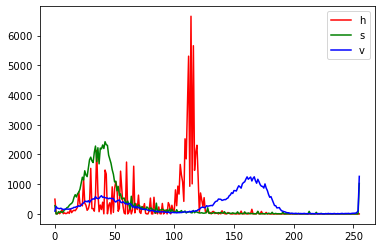

[206050. 234494. 189522.  94177. 122621.  77649.  46492.  74936.  29964.
 202270. 230714. 185742.  90397. 118841.  73869.  42712.  71156.  26184.
 271012. 299456. 254484. 159139. 187583. 142611. 111454. 139898.  94926.
 348484. 376928. 331956. 236611. 265055. 220083. 188926. 217370. 172398.
 198193. 226637. 181665.  86320. 114764.  69792.  38635.  67079.  22107.
 595345. 623789. 578817. 483472. 511916. 466944. 435787. 464231. 419259.
 191299. 219743. 174771.  79426. 107870.  62898.  31741.  60185.  15213.
 189787. 218231. 173259.  77914. 106358.  61386.  30229.  58673.  13701.]


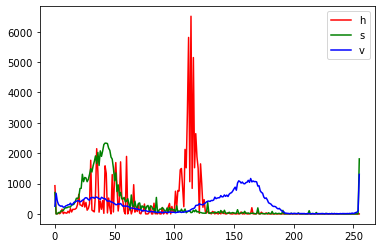

In [8]:
import os
from os import listdir

colour_features = []
 
folder_dir = "C:/Users/Souvik/Desktop/Video1"
for images in os.listdir(folder_dir):
    img = cv2.imread(os.path.join(folder_dir,images))
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    F = get_F(h, s, v)
    print(F)
    colour_features.append(F)
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(colour_features)

In [12]:
kmeans.labels_

array([2, 2, 1, 0, 0, 0, 1])

In [16]:
cents = kmeans.cluster_centers_
cents

array([[212013.33333333, 244330.33333333, 198814.33333333,
         79033.33333333, 111350.33333333,  65834.33333333,
         37652.33333333,  69969.33333333,  24453.33333333,
        209184.33333333, 241501.33333333, 195985.33333333,
         76204.33333333, 108521.33333333,  63005.33333333,
         34823.33333333,  67140.33333333,  21624.33333333,
        282594.33333333, 314911.33333333, 269395.33333333,
        149614.33333333, 181931.33333333, 136415.33333333,
        108233.33333333, 140550.33333333,  95034.33333333,
        348498.33333333, 380815.33333333, 335299.33333333,
        215518.33333333, 247835.33333333, 202319.33333333,
        174137.33333333, 206454.33333333, 160938.33333333,
        215862.33333333, 248179.33333333, 202663.33333333,
         82882.33333333, 115199.33333333,  69683.33333333,
         41501.33333333,  73818.33333333,  28302.33333333,
        610170.33333333, 642487.33333333, 596971.33333333,
        477190.33333333, 509507.33333333, 463991.3333333

In [ ]:
# check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

In [8]:
folder='C:/Users/Souvik/Desktop/Video1'
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [10]:
folder

'C:/Users/Souvik/Desktop/Video1'

In [45]:
path = r'C:\Users\Souvik\Desktop\Video1\frame0.jpg'

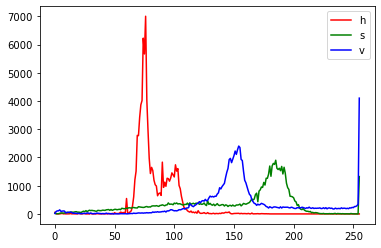

In [46]:
img = cv2.imread(path)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()